## Logistic Regression
Inicialmente se trabajo con el dataset diamonds, pero debido a que este dataset no contaba con tantas variables categóricas el resultado de clasificación no fue el esperado, por tanto se decidió trabajar con otro dataset que tuviera más variables categóricas<br>
**Link Dataset:** https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels

In [48]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

df_obesity = pd.read_csv('obesity.csv')
df_obesity.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [49]:
# Select the columns we want to use
columns_to_select = ['Gender','CALC','FAVC','SCC','SMOKE','family_history_with_overweight','CAEC','MTRANS','NObeyesdad']
obesity = df_obesity.loc[:, columns_to_select]

# Drop rows with missing values
obesity.dropna(inplace=True)
obesity.head()

,Gender,CALC,FAVC,SCC,SMOKE,family_history_with_overweight,CAEC,MTRANS,NObeyesdad
0,Female,no,no,no,no,yes,Sometimes,Public_Transportation,Normal_Weight
1,Female,Sometimes,no,yes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,Frequently,no,no,no,yes,Sometimes,Public_Transportation,Normal_Weight
3,Male,Frequently,no,no,no,no,Sometimes,Walking,Overweight_Level_I
4,Male,Sometimes,no,no,no,no,Sometimes,Public_Transportation,Overweight_Level_II


# Let's have a look to our data!

By visualising it with Seaborn

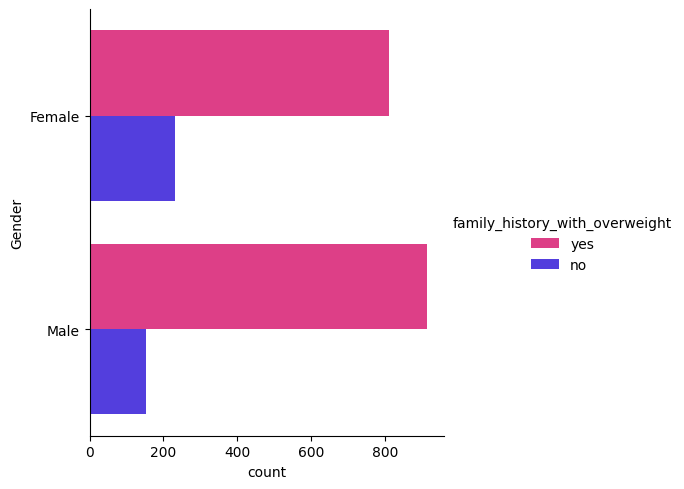

In [50]:
import seaborn as sns
# Specify colors for each values of the hue variable
palette = {
    'yes': '#F72585',
    'no':  '#4023F7',
}
# Plot a bar plot to visualize how many obesity of each cut are diferent colors
sns.catplot(
    data=obesity, y="Gender", hue="family_history_with_overweight", kind="count",
    palette=palette,
)

# Data pre-processing

Let's encode features and labels to better plot the data and train the model

In [51]:
# Let's look at the different values of the 'Clarity' column
obesity['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [52]:
from sklearn.preprocessing import OrdinalEncoder
# Encode the 'Clarity' column using ordinal encoding
item_size_categories = [(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'])]
ordinal_features = ['NObeyesdad']
ordinal_encoder = OrdinalEncoder(categories=item_size_categories)

In [53]:
from sklearn.preprocessing import OneHotEncoder
# Encode all the other features using one-hot encoding
categorical_features = ['Gender','CALC','FAVC','SCC','SMOKE','CAEC','MTRANS']
categorical_encoder = OneHotEncoder(sparse_output=False)

In [54]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[
     ('ord', ordinal_encoder, ordinal_features),
     ('cat', categorical_encoder, categorical_features)
     ])
# Get the encoded features as a pandas DataFrame
ct.set_output(transform='pandas')
encoded_features = ct.fit_transform(obesity)
encoded_features.head()

,ord__NObeyesdad,cat__Gender_Female,cat__Gender_Male,cat__CALC_Always,cat__CALC_Frequently,cat__CALC_Sometimes,cat__CALC_no,cat__FAVC_no,cat__FAVC_yes,cat__SCC_no,...,cat__SMOKE_yes,cat__CAEC_Always,cat__CAEC_Frequently,cat__CAEC_Sometimes,cat__CAEC_no,cat__MTRANS_Automobile,cat__MTRANS_Bike,cat__MTRANS_Motorbike,cat__MTRANS_Public_Transportation,cat__MTRANS_Walking
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [55]:
from sklearn.preprocessing import LabelEncoder
# Encode the 'Color' column using label encoding
label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(obesity['family_history_with_overweight'])
encoded_obesity = encoded_features.assign(Family=encoded_label) #Gender Label enconding
encoded_obesity.head()

,ord__NObeyesdad,cat__Gender_Female,cat__Gender_Male,cat__CALC_Always,cat__CALC_Frequently,cat__CALC_Sometimes,cat__CALC_no,cat__FAVC_no,cat__FAVC_yes,cat__SCC_no,...,cat__CAEC_Always,cat__CAEC_Frequently,cat__CAEC_Sometimes,cat__CAEC_no,cat__MTRANS_Automobile,cat__MTRANS_Bike,cat__MTRANS_Motorbike,cat__MTRANS_Public_Transportation,cat__MTRANS_Walking,Family
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [56]:
# Let's look at the mapping between the encoded values and the original values
list(label_encoder.inverse_transform([0, 1]))

['no', 'yes']

# Analysing relationships between features and label

In [57]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

<ipython-input-58-a57c9c4d518d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(
<ipython-input-58-a57c9c4d518d>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


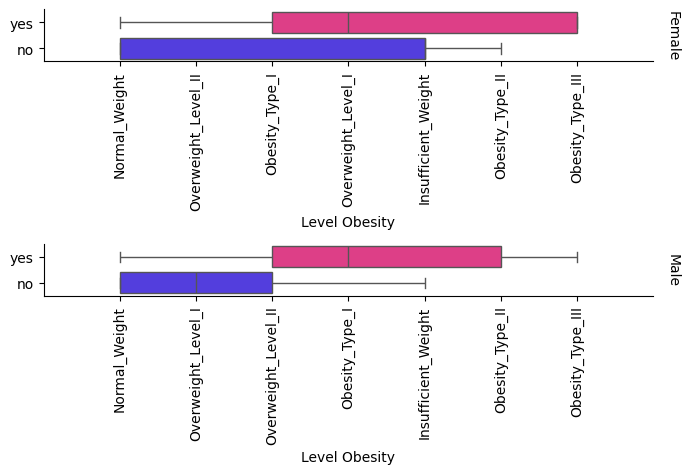

In [58]:
palette = {
    'yes': '#F72585',
    'no': '#4023F7',
}
# We need the encoded Item Size column to use it as the x-axis values in the plot
df_obesity['Family'] = encoded_obesity['Family']

g = sns.catplot(
    data=obesity,
    x="NObeyesdad", y="family_history_with_overweight", row='Gender',
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=1.8, aspect=4, palette=palette,
)
# Defining axis labels
g.set(xlabel="Level Obesity", ylabel="").set(xlim=(-1,7))
g.set_titles(row_template="{row_name}")

plt.subplots_adjust(hspace=3.5)
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Let's now focus on a specific relationship: Item Size and Color!

In [59]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='seaborn')

<Axes: xlabel='Family', ylabel='ord__NObeyesdad'>

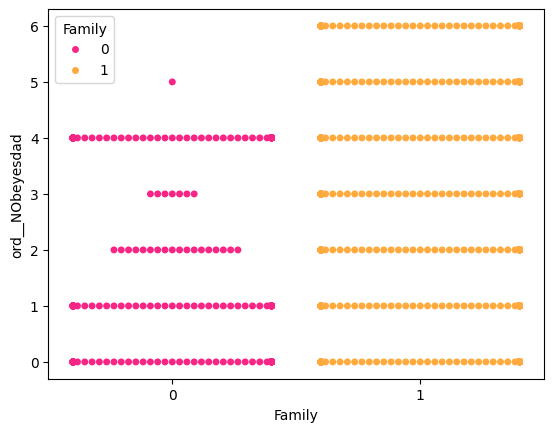

In [60]:
# Suppressing warning message claiming that a portion of points cannot be placed into the plot due to the high number of data points
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='seaborn')

palette = {
     0 : '#F72585',
     1 : '#FFAA3E',
}
sns.swarmplot(x="Family", y="ord__NObeyesdad", hue="Family", data=encoded_obesity, palette=palette)

**Watch out**: Ignoring warnings is NOT a best practice and should be avoid, whenever possible. Warnings often contain useful messages that let us improve our code and solve an issue.
The reason why we are ignoring this specific warning is to guarantee the readability of the plot. Plotting all the data points with a reduced marker size, while keeping consistency with the palette color, generates an unclear visualization.

# Build your model

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
# X is the encoded features
X = encoded_obesity[encoded_obesity.columns.difference(['Family'])]
# y is the encoded label
y = encoded_obesity['Family']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [62]:
from sklearn.metrics import f1_score, classification_report
from sklearn.linear_model import LogisticRegression

# Train a logistic regression model on the obesity dataset
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model and print the results
print(classification_report(y_test, y_pred))
print('Predicted labels: ', y_pred)
print('F1-score: ',f1_score(y_test, y_pred, average='weighted'))

              precision    recall  f1-score   support

           0       0.52      0.18      0.27        83
           1       0.83      0.96      0.89       340

    accuracy                           0.81       423
   macro avg       0.67      0.57      0.58       423
weighted avg       0.77      0.81      0.77       423

Predicted labels:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [63]:
# Calcular R^2
r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2}")

R^2: -0.22912827781715106


In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

TN = np.sum((y_test == 0) & (y_pred == 0))
TP = np.sum((y_test == 1) & (y_pred == 1))
FP = np.sum((y_test == 0) & (y_pred == 1))
FN = np.sum((y_test == 1) & (y_pred == 0))

matrix_confusion=np.array([[TN,FP],[FN,TP]])
print(matrix_confusion)

accuracy_f = np.round(accuracy_score(y_test, y_pred),2)
precision_f = np.round(precision_score(y_test, y_pred),2)
recall_f = np.round(recall_score(y_test, y_pred),2)
f1_f = np.round(f1_score(y_test, y_pred),2)

precision = np.round((TP/(TP+FP)), 2)
recall = np.round((TP/(FN+TP)), 2)
f1 = np.round((2*((precision*recall)/(precision+recall))), 2)
accuracy = np.round(((TP+TN)/(TP+TN+FP+FN)), 2)


print(f"Precisión: Función: {precision_f} Manual: {precision}")
print(f"Recall:    Función: {recall_f} Manual: {recall}")
print(f"F1:        Función: {f1_f} Manual: {f1}")
print(f"Accuracy:  Función: {accuracy_f} Manual: {accuracy}")

[[ 15  68]
 [ 14 326]]
Precisión: Función: 0.83 Manual: 0.83
Recall:    Función: 0.96 Manual: 0.96
F1:        Función: 0.89 Manual: 0.89
Accuracy:  Función: 0.81 Manual: 0.81


In [66]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[ 15,  68],
       [ 14, 326]])

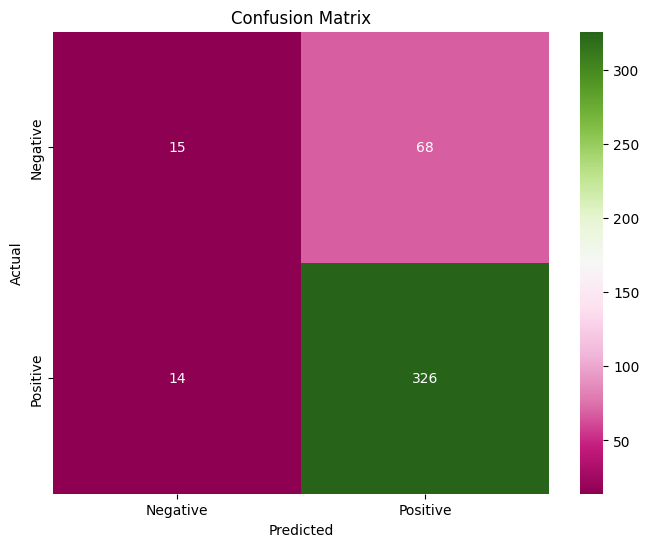

In [67]:
# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='PiYG', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

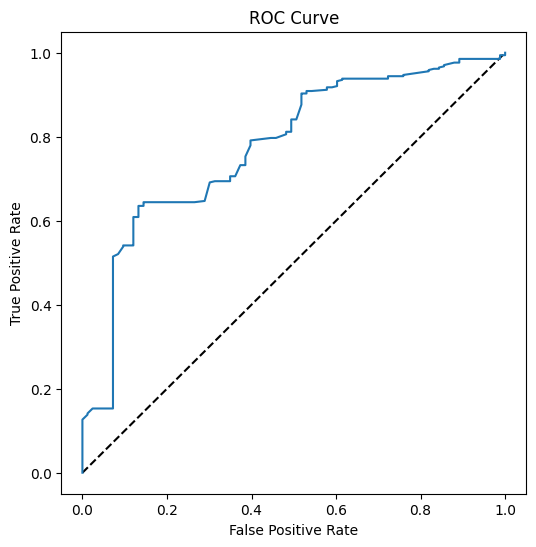

FPR: [0.         0.         0.         0.         0.         0.
 0.         0.01204819 0.01204819 0.02409639 0.03614458 0.07228916
 0.07228916 0.07228916 0.07228916 0.07228916 0.07228916 0.07228916
 0.08433735 0.09638554 0.09638554 0.12048193 0.12048193 0.12048193
 0.12048193 0.12048193 0.12048193 0.13253012 0.13253012 0.13253012
 0.14457831 0.14457831 0.14457831 0.26506024 0.28915663 0.30120482
 0.31325301 0.34939759 0.34939759 0.34939759 0.36144578 0.37349398
 0.38554217 0.38554217 0.38554217 0.39759036 0.39759036 0.39759036
 0.44578313 0.45783133 0.48192771 0.48192771 0.4939759  0.4939759
 0.4939759  0.4939759  0.4939759  0.5060241  0.51807229 0.51807229
 0.51807229 0.53012048 0.53012048 0.54216867 0.57831325 0.57831325
 0.59036145 0.60240964 0.60240964 0.60240964 0.61445783 0.61445783
 0.72289157 0.72289157 0.75903614 0.75903614 0.81927711 0.81927711
 0.8313253  0.84337349 0.84337349 0.85542169 0.85542169 0.87951807
 0.89156627 0.89156627 0.93975904 0.95180723 0.97590361 0.98795181

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score

y_scores = model.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
# Mostrar los valores de FPR, TPR y thresholds para cada clase

print(f'FPR: {fpr}')
print(f'TPR: {tpr}')
print(f'Thresholds: {thresholds}\n')

In [69]:
# Calculate AUC score
auc = dict()
auc= roc_auc_score(y_test,y_scores[:,1])
print(f'AUC:{auc}')

AUC:0.7769666902905741
